This is the pipeline to obtain the predicted folding intermediate from the protein Saccharomyces cerevisiae (baker's yeast) glutamine amidotransferase, the N-terminal domain. In general this should be the approach to follow with all the protein candidates and the idea would be to implement the whole process in a bioinformatic pipeline that allows us to discover interesting hits that fullfill the following charachteristics: 

a) Show rare codons

Reference: 
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0003412

Server: 
http://www.codons.org/index.html

b) Show predicted folding intermediates 

Reference: 

https://www.pnas.org/content/114/43/11434

Code: 
https://faculty.chemistry.harvard.edu/shakhnovich/software

c) Show interesting hits to other folds in the range of the predicted intermediates

Reference: 

https://www.sciencedirect.com/science/article/abs/pii/S0022283617305879

Server: 

https://toolkit.tuebingen.mpg.de/tools/hhpred

The rationale behind this approach is that some structural charachteristics of the protein folds are conserved because of the influence of the ribosome on the folding intermediates. In this case if we are able to detect hits to related folds from specific seeds this folding intermediates might have originated because of the influence of the ribosomal tunnel on the folding process. We have the triple filtering approach: conserved rare codons, predicted folding intermediates and fragments conserved among different folds. 

For starters we select the protein we want to charachterize, in this case I want to charachterize from the PDB database:

1JVN

CRYSTAL STRUCTURE OF IMIDAZOLE GLYCEROL PHOSPHATE SYNTHASE: A TUNNEL THROUGH A (BETA/ALPHA)8 BARREL JOINS TWO ACTIVE SITES

https://www.rcsb.org/structure/1jvn

I first start by doing an hhpred job with the full fasta sequence of the protein: 

>1JVN_1|Chains A,B|BIFUNCTIONAL HISTIDINE BIOSYNTHESIS PROTEIN HISHF|Saccharomyces cerevisiae (4932)
GSHMPVVHVIDVESGNLQSLTNAIEHLGYEVQLVKSPKDFNISGTSRLILPGVGNYGHFVDNLFNRGFEKPIREYIESGKPIMGICVGLQALFAGSVESPKSTGLNYIDFKLSRFDDSEKPVPEIGWNSCIPSENLFFGLDPYKRYYFVHSFAAILNSEKKKNLENDGWKIAKAKYGSEEFIAAVNKNNIFATQFHPEKSGKAGLNVIENFLKQQSPPIPNYSAEEKELLMNDYSNYGLTRRIIACLDVRTNDQGDLVVTKGDQYDVREKSDGKGVRNLGKPVQLAQKYYQQGADEVTFLNITSFRDCPLKDTPMLEVLKQAAKTVFVPLTVGGGIKDIVDVDGTKIPALEVASLYFRSGADKVSIGTDAVYAAEKYYELGNRGDGTSPIETISKAYGAQAVVISVDPKRVYVNSQADTKNKVFETEYPGPNGEKYCWYQCTIKGGRESRDLGVWELTRACEALGAGEILLNCIDKDGSNSGYDLELIEHVKDAVKIPVIASSGAGVPEHFEEAFLKTRADACLGAGMFHRGEFTVNDVKEYLLEHGLKVRMDEE

https://toolkit.tuebingen.mpg.de/jobs/3116262


From here we see the following result

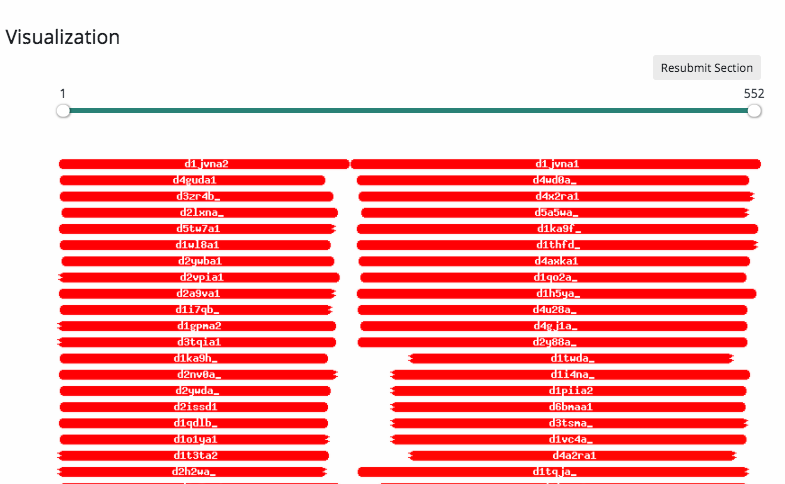

In [11]:
from IPython.display import Image
Image("/Users/jose/cg_cotrans/1jvn_hhpred.png")

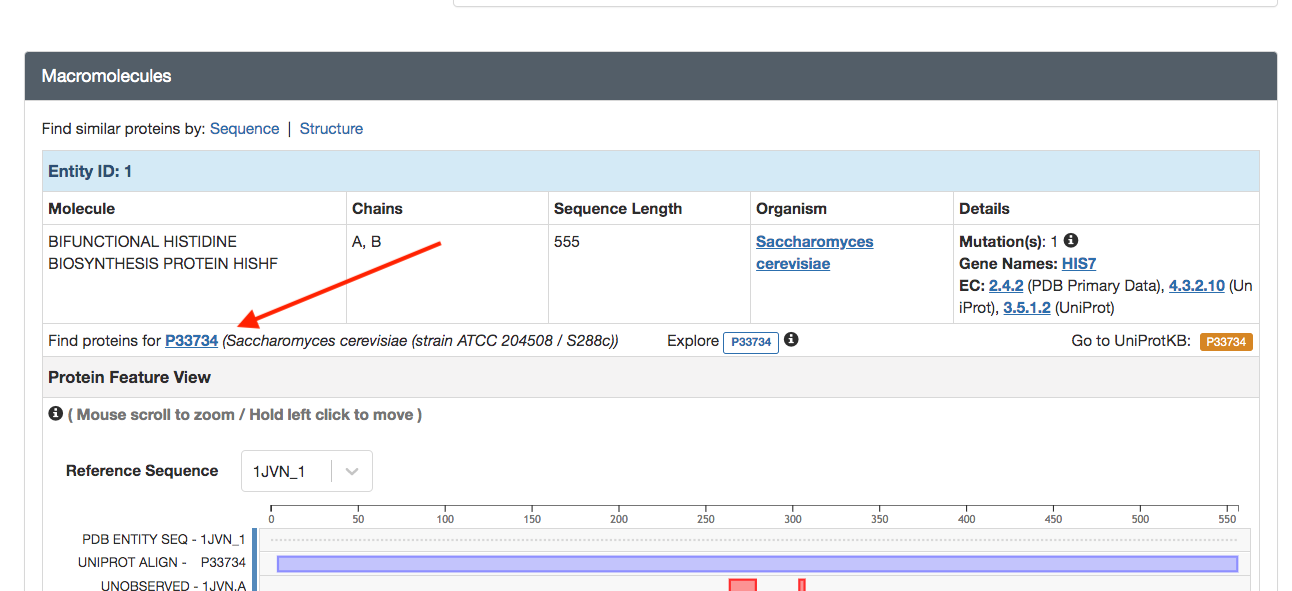

In [13]:
#In this case we see that the protein is a two-domain protein. 
#So we go again to the PDB and we get the UNIPROT identifier to get the DNA sequence: 
from IPython.display import Image
Image("/Users/jose/cg_cotrans/uniprot-1jvn.png")


Once with the UNIPROT identifier we look for it in uniprot:

https://www.uniprot.org/uniprot/P33734

And we look for the cross reference section of the web to get the Fasta DNA 


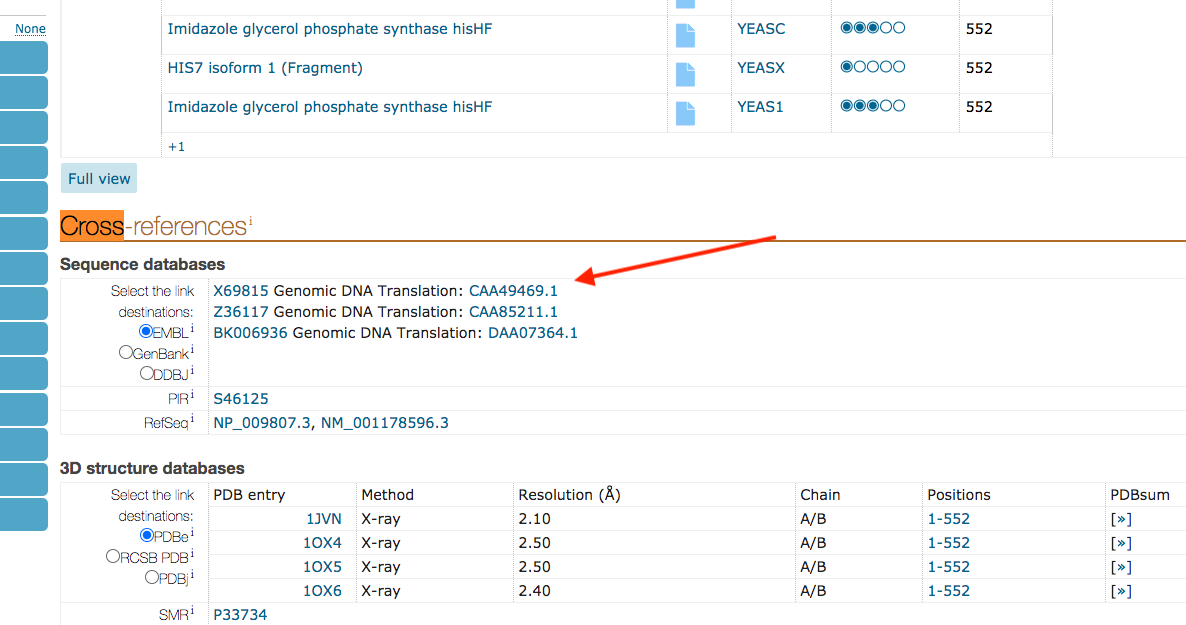

In [22]:
from IPython.display import Image
Image("/Users/jose/cg_cotrans/1jvn-uni-cross-ref.png")

We then download the fasta sequence in our working folder shown here in the following cell, our fasta sequence is CAA49469.1-full.fasta. Then we need to cut only the part of the fasta sequence that corresponds to the domain we want to try, in this case is the N-terminal domain. So we go to APE and open the fasta sequence, there we look back into our hhpred job to screen for the domains. We see that the domain we want is the N terminal so we chop the second domain and we generate the file CAA49469.1.fasta. Once we get that one is when we run the program to predict cotranslational folding intermediates. 

In [16]:
%ls

1a3w/
1jvn-uni-cross-ref.png
1jvn.pdb.gz
1jvn_hhpred.png
1m9h-jupyter/
1m9h-test/
1w0m-test/
1yxm-test/
2tps-test/
CAA49469.1-full.fasta
CAA49469.1.fasta
CAA49469.1_elongation_profile.dat
MinMax-CAA49469.1.txt
Pipeline  1JVN  HISHF.ipynb
Pipeline to run the cotranslational folding 1a3w.ipynb
README
__pycache__/
calc_absolute_energies.py
calc_codon_usage.py
calc_consensus_contacts.py
calc_elongation.py
calc_profile_comparison.py
calc_rare_enrichment.py
codons.py
fe.py
hemk-test/
parse-columns.py
polymer.dat
polymer.py
polymer_abs_energies.dat
substructures.py
uniprot-1jvn.png


In [18]:
#This is the first part of the program where the program calculates the file
#polymer.dat
%run calc_consensus_contacts.py CAA49469.1.fasta 1JVN

@> 8818 atoms and 1 coordinate set(s) were parsed in 0.10s.
DEBUG:.prody:8818 atoms and 1 coordinate set(s) were parsed in 0.10s.


Found 1 chains.
1JVN  99.12
Using 1 chains with percentid >= 95.
Number of residues: 226
Minimum consensus fraction: 0.25
Total bond energy: 200.9921875
Writing polymer.dat


Then we run the second code to calculate the polymer energies

In [19]:
%run calc_absolute_energies.py polymer.dat

# Polymer: polymer.dat
# mu = -2.0
# ndim = 3.0
# kuhnlength = 2.0
# dFdN = -0.075
# dF = -16.95
# Number of residues: 226
# Number of contacts: 511
Writing polymer_abs_energies.dat


In this case we run the last code to get the final elongation profile

In [20]:
%run calc_elongation.py CAA49469.1 polymer_abs_energies.dat

# nresidues = 226
# Writing CAA49469.1_elongation_profile.dat


From here we use a small script to plot the important columns of the file elongation_profile.dat

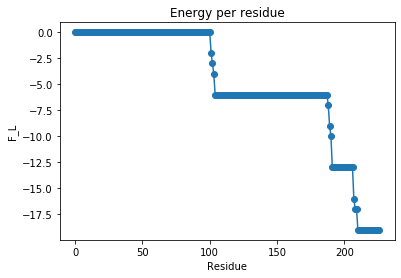

In [21]:
%run parse-columns.py CAA49469.1_elongation_profile.dat

From here we see a folding intermediate indicated at round 100 residues. Then we go an check what the rare codon calculator tell us. http://www.codons.org/index.html

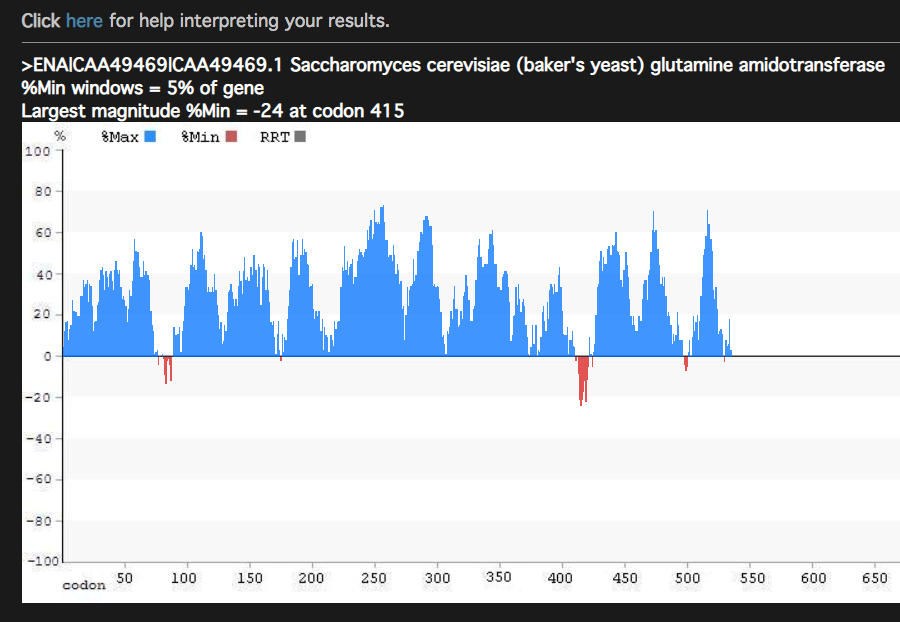

In [23]:
from IPython.display import Image
Image("/Users/jose/cg_cotrans/rare-codon-1jvn.png")

We have two zones of predicted rare codons (remember we are only analysing the first 1-229 residues in this case, later on we will analyse the next domain (229-550). NOTE it is very important to submit the rare codon calculation with the proper codon usage, namely if we are going to analize a sacharomices protein we must use the sacharomices codon usage. Otherwise we will get spurious results. So we have two zones of rare codons one at around 80 codons (aa) another one at around 175 codons (aa)

Im this case we do not see a convergence of the two programs since we see a folding intermediate at around 90 residues and rare codons at 80. We would expect to see a folding intermediate around 30 rsidues after a cluster of rare codons (because of the space that takes up the ribosomal tunnel). Lets see what we see in HHpred. 

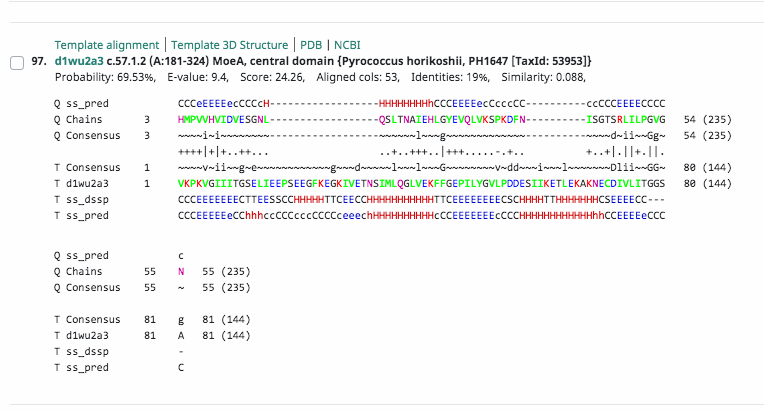

In [24]:
from IPython.display import Image
Image("/Users/jose/cg_cotrans/1jvn-hhpred.png")

We see a nice hit that corresponds to the folding intermediate that we would expect with a rare codon enrichment from 1 to 55 residues. We can see a superposition of both structures.

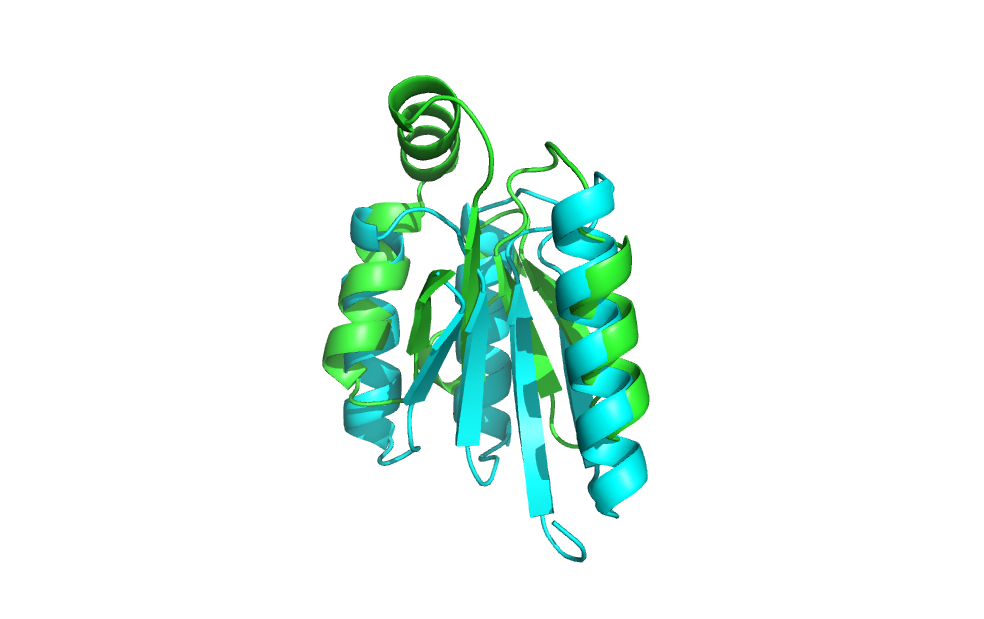

In [1]:
from IPython.display import Image
Image("/Users/jose/cg_cotrans/c.23-c.93.png")